# Beam Search and BLEU

## 강의 소개
- **Beam Search란?**
    - 문장을 decoding 하는 데에 사용하는 대표적인 알고리즘
    - TEST Time에서 조금 더 좋은 품질을 얻을 수 있음
    - 기존의 아래 문제점으로 나온 대안임
        - 언어 모델이 문장을 generation할 때에는 확률값에 기반한 다양한 경우의 수가 존재
        - 모든 경우의 수를 고려하는 것은 비효율적이며 너무 작은 확률값까지 고려한다면 생성된 문장의 quality가 떨어짐
        - 가장 높은 확률값을 고려하는 방법 역시 모델이 단순한 generation을 하도록 하게 만드는 단점
- **BLEU score란?**
    - 번역 task에서 번역된 문장을 평가하는 대표적인 metric
    - precision을 고려하는 이유는??

## Further Question
- BLEU score가 번역 문장 평가에 있어서 갖는 단점은 무엇이 있을까요?  
    - 우리는 BLEU에서 N-gram Precision을 계산하는데 있어 정확히 매칭되는 것만 카운팅을 하고 있다는 것에 주목했습니다. '이쁘다'와 '예쁘다'는 분명히 비슷한 뜻인데 0, 1로만 구분해서 집계(Discrete Counting) 하기에 매칭이 되지 않는 결과가 발생한 것입니다. 때문에 비슷한 단어에 대해 0과 1사이의 어떤 유사도(Similarity)를 연속적(Continuous)으로 부여할 수 있다면, 이것이 훨씬 더 좋은 결과를 낼 수 있을 것이라 생각했습니다 (ABLEU를 만들어 냄)
    - 먼저 BLEU가 여러가지 스코어의 곱으로 이루어져 있기 때문에 문장단위에서는 0의 점수를 가질 확률이 높으며 따라서 corpus 단위로만 평가 가능하다.
    - 또 BLEU는 한 개의 사람이 번역한 레퍼런스에 대한 점수를 내는 방식이다. 한 개의 레퍼런스 안에는 기계 번역의 n-gram들과 밀접하게 관련된 이러 저러한 단어들로 구성되어 있을진대, 같은 말일지라도 다른 표현이 가능한 만큼 여러 개의 레퍼런스로부터 BLEU를 계산할 수 있다면 더 좋을 것이다. 따라서 BLEU를 조금 개선하여 여러개의 레퍼런스를 참조할 수 있도록 바꾼 버전도 존재한다.

    - 좀 더 본질적으로는 BLEU와 좋은 번역임 과의 관계가 필요 충분 조건을 만족하지 못한다는 점이다. BLEU가 높은 기계 번역이더라도 사람의 번역 품질보다 훨씬 떨어지는 경우가 많다.

출처: https://tech.kakaoenterprise.com/50 [카카오엔터프라이즈 기술블로그 Tech&(테크앤)]  
출처: https://dalpo0814.tistory.com/46 [deeep]


## Beam Search
- Beam Search란?
    - 문장을 decoding 하는 데에 사용하는 대표적인 알고리즘
    - TEST Time에서 조금 더 좋은 품질을 얻을 수 있음
- 기존 문제점
    - 그리디 디코딩
        - 전체문장의 확률을 보는 것이 아니라 현재 타임스텝에서 가장 좋아보이는 단어를 뽑는 것
        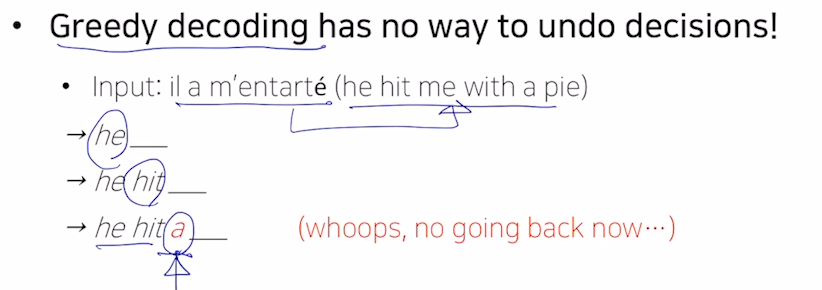
- 나온 해결책 (근데 문제점이 있음)
    - Exhaustive search
        - 아래 그림처럼 joint probility를 따지는 전체를 보는 것이 필요함
        - 문제는 너무 경우의 수가 많고 계산량도 많다는 단점이 있음
    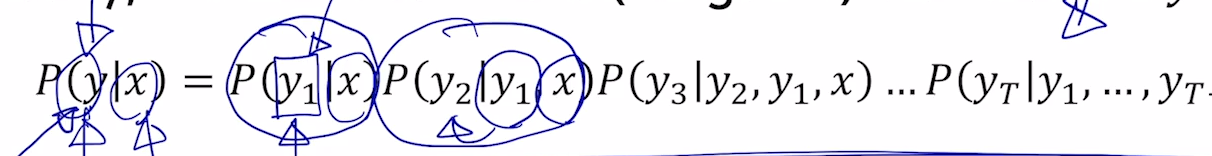
- Beam Search의 해결책 (차선책)
    - 그리디 디코딩과 Exhaustive search의 중간정도를 취할 필요가 있음
    - 정해놓은 k개의 가능한 가지수를 고려하고, Time step이 진행해도 k개의 개수를 유지하고, 전체를 진행하고 k 개중 가장 높은 확률을 선택하는 것
    - 모든 경우를 다 따진것은 아니지만 효율적으로 따져볼 수 있음
- Beam Search 사용 예시
    - 아래의 확률(0~1)에 log를 취하면 최대가 0이고 다 음수로 나오는 단조증가 함수로 표현됨
    - 계속 k승으로 경우의 수가 늘어나는 것은 아니고 아래 그림처럼 확률높은 2개에서 2가지 경우를 계속 생각하는 형식으로 뽑음
        - 즉 2개애서 2개씩 예측하면 4개고 그중에 2개 선정해서 또 2개더 예측하고 이런식임
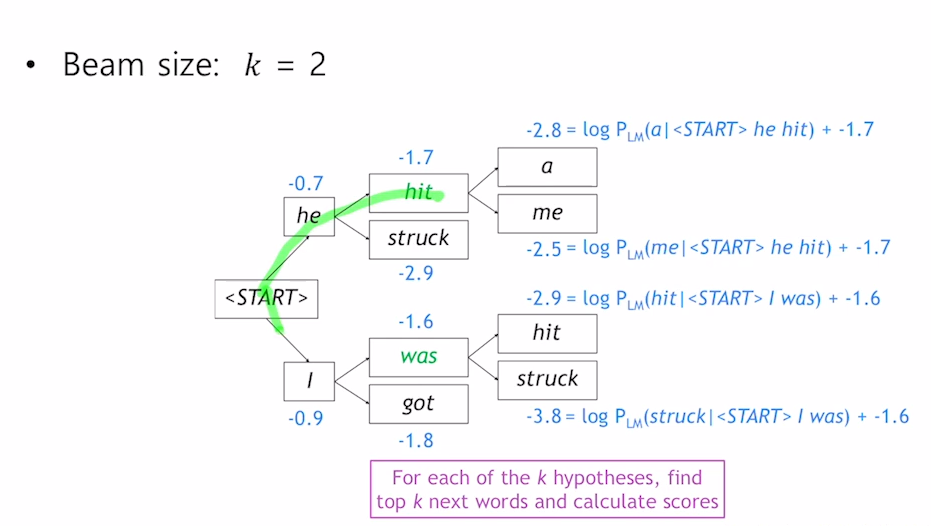
- 종료 조건?
    - \<END\>가 나오면 hypothesis를 종료하고 나머지 hypothesis는 계속 진행을 함
        - 결국 T라는 정해둔 최대 Timestep이 넘어가면 종료기도 하고
        - n개의 search 값이 완료되면 종료하기도 함
- Beam Search 위 형태의 문제점?
    - 긴 hypotheses는 log 형태로 계속 빼주니깐 확률이 낮아지게 됨
    - 해결책은 아래와 같이 평균을 내어서 해주게 됨 (타임스텝이 길었으면 그 길이만큼 나누어줌)
    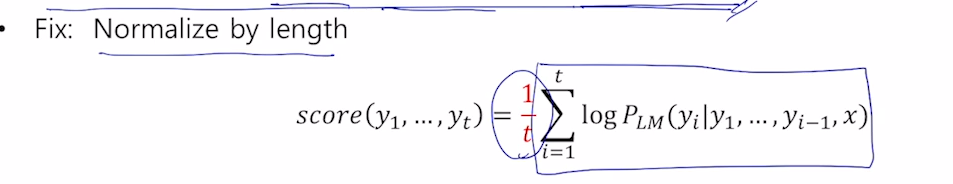

## BLEU Score
- Seq2Seq 평가 방법? (2가지 있음, Precision & Recall)
    - 문제가 있는 평가방법
        - 학습시 : 각 단어별로 걸리는 softmax 정답단어에 부여된 확률값이 커지도록 학습이 진행됨
        - 학습 완료 후?
            - 정확도 평가 : TEST 데이터에대해서 Softmax 데이터의 Loss 계산하거나, 분류 정확도를 계산함
        - 하지만? I love you라고 나와야하는데, oh I love you. 라고 뽑으면 정확도 0 으로 분류 될 수 있음
        - 따라서 시퀀스 문장과 정답 문장 전체적인 차원에서 평가를 진행할 필요가 있음  

    - Precision & Recall
       - Precision(정밀도)
           - 예측 단어 수 중에 겹치는 단어 숫자?
       - Recall(재현율)
           - Reference 단어 숫자 겹치는 단어 숫자
           - 스타크래프트의 리콜에서 드라군 몇마리를 리콜하려했는데, 결국 몇마리 리콜 되었다 라는 개념
       - 위 2개를 동시에 보려면? : 조화평균을 사용 왜? 작은 값에 더 큰 가중치를 주는 방식(산술평균 >= 기하 >= 조화)
           - 산술평균 : 그냥 평균
           - 기하평균 : a, b 를 곱하고, 루트를 취하는 방법
           - 조화평균 : a, b 역수를 구하고 산술평균을 구해서, 다시 역수를 취하는 방법
       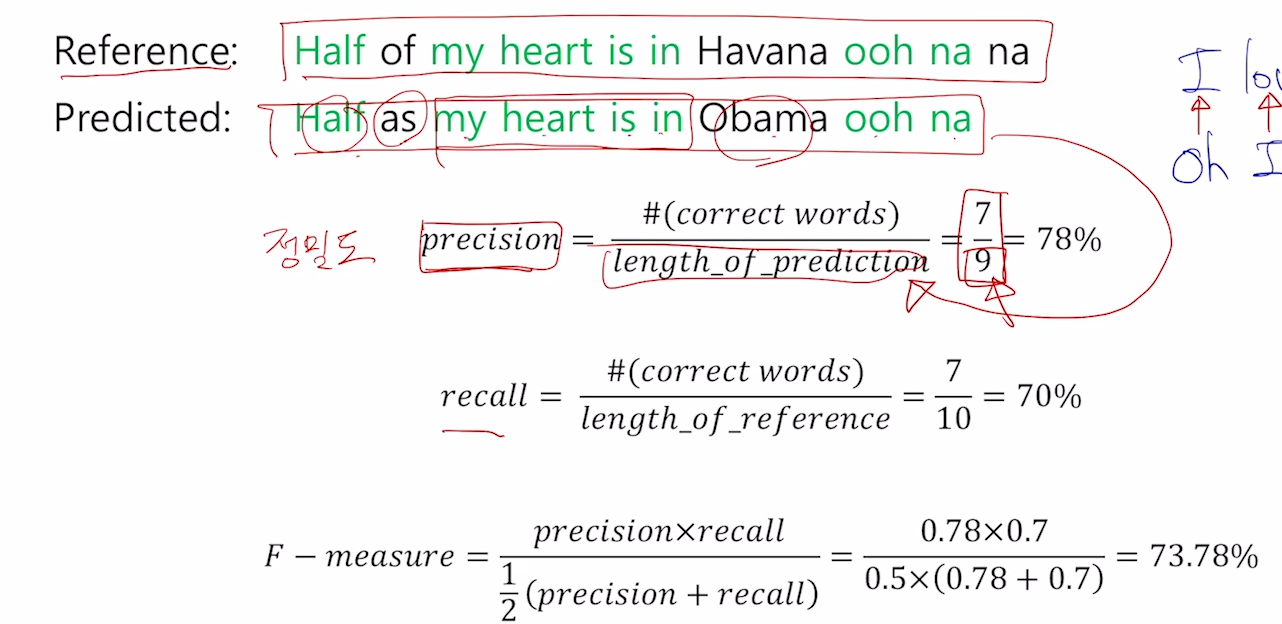
       - 문제점? : 정렬이 안된 것에 대한 패널티가 없음
           - 그래서 BLEU Score 씀!!
- BLEU Score
    - N-gram : N개의 연속된 단어로 봤을 때 Ground Truth(정답)와 어느정도 겹치는가
    - precision만 고려, Recall은 고려하지 않음 why??
        - 주어진 예측문장에서 얼마나 겹치는가를 보니깐 (나는 영화를 정말 많이 사랑한다. 에서 정말을 빼고 예측해도 같은 의미임)
    - N-gram을 이용할때 1~4까지 n을 증가시키면서 기하평균을 내게됨 (조하평균은 낮은 값에 너무 큰 가중치를 줘서 안씀)
    - 아래 식 분석
        - min항 : 예측을 너무 짧게하면 패널티를 준다 (Recall을 약간 고려했다고 볼 수 있음)
        - precision은 N-gram을 증가시키면서 기하평균낸 것 (N=1~4)
    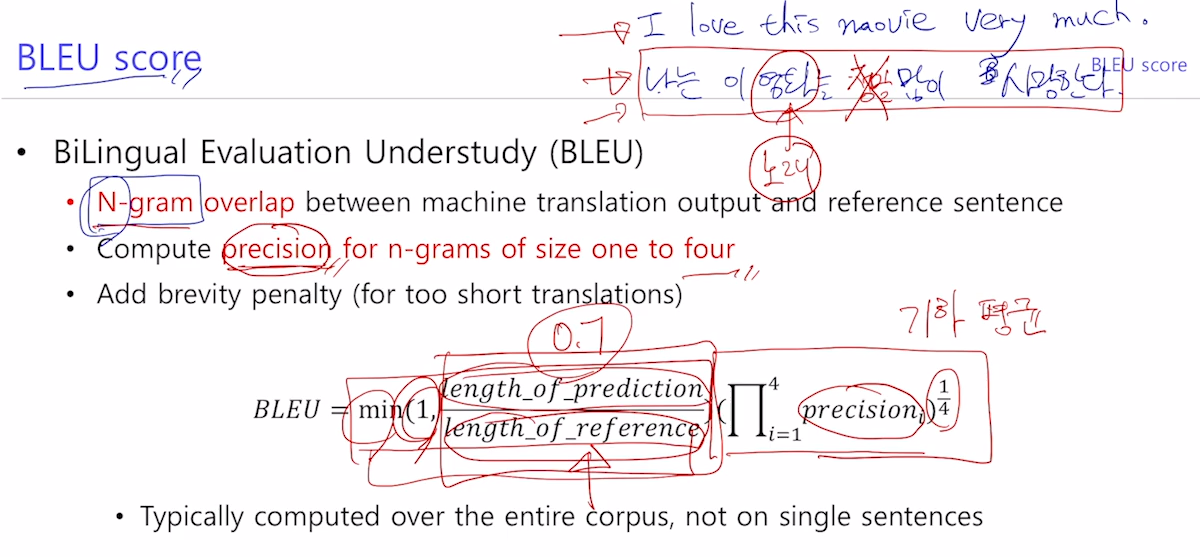
- BLEU 예시
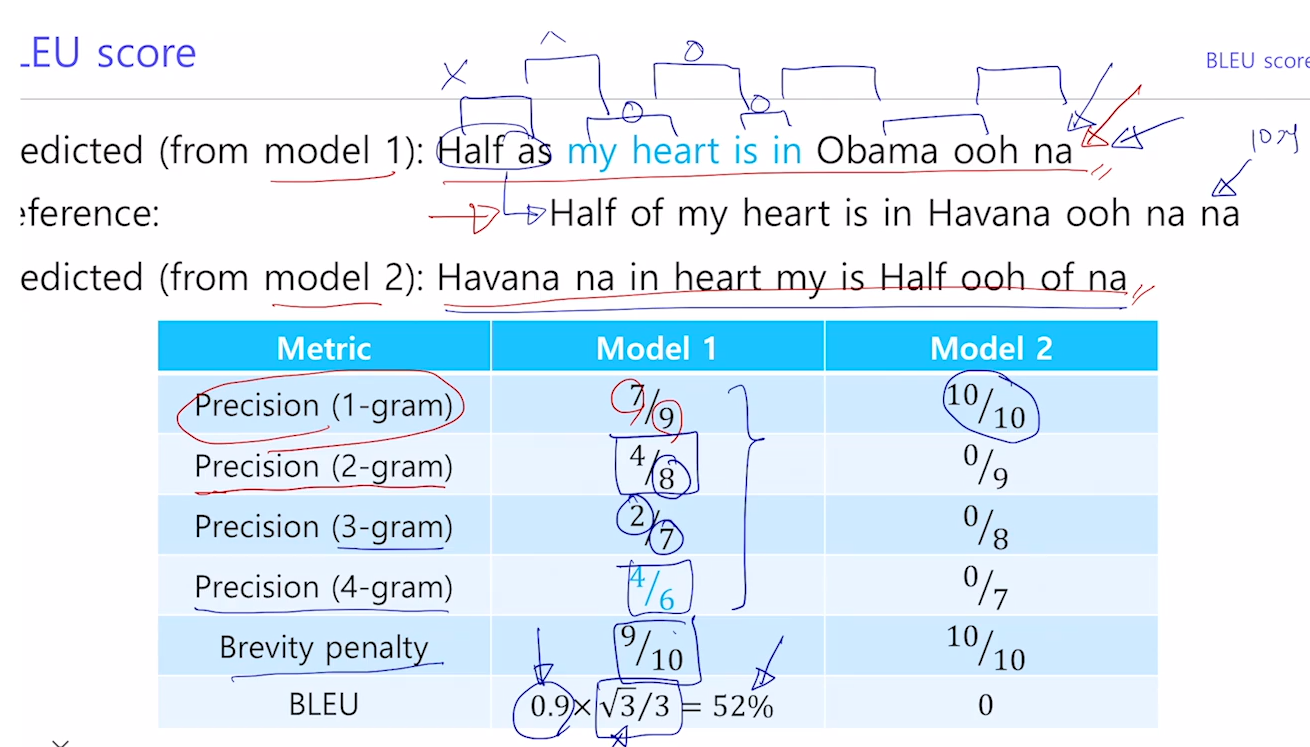